<h1 style="margin-bottom:0"><center>DI 501 - Introduction to Data Informatics</center></h1>
<h2 style="margin-top:0"><center>Data Preprocessing Tutorial</center></h2>
<br>
<p style="margin-top:0"><center><b>This tutorial is prepared for Middle East Technical University's DI 501 - Introduction to Data Informatics course.</b></center></p>
<hr style="height:2px;color:navy;margin-top:0">
<p style="margin-top:0; text-align: justify; font-size:15px">In this tutorial, we will talk about how to handle different kinds of data preprocessing methods. First, we will talk about data type constraints, then we will look at value inconsistencies. We will also look at how to deal with duplicates and null values and finish our discussion by collapsing data into categories. </p>
<p style="margin-top:1; text-align: justify; font-size:15px"> </p>

<h3 style="margin-bottom:0">1) Installation</h3>
<br>
<p style="margin-top:0; text-align: justify">Here, we will be mostly utilizing Pandas functions. However, we will also show you many other libraries that you can use for data preprocessing, here we will show how to install them on your device. </p>
<p style="margin-top:1; text-align: justify">If you have Python, you can proceed to install them the following codes (you can change "missingno" with any other library that is in the part 2: </p>

In [1]:
#conda install missigno

or

In [2]:
#pip install missingno

<h3 style="margin-bottom:0">2) Importing</h3>
<br>
<p style="margin-top:0; text-align: justify">We import our libraries here. </p>

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import chardet
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.imputation.mice as mice
import statsmodels.api as sm

ModuleNotFoundError: No module named 'chardet'

<h3 style="margin-bottom:0">3) Data</h3>
<br>
<p style="margin-top:0; text-align: justify"> Our dataset consists of a made up demographic information. Column names are pretty self-explanatory. First, we will have a look at whether we have imported it correctly by sampling it.
<br>

In [4]:
df = pd.read_csv('demographics.csv', delimiter=';')
df.sample(5)

,First Name,Last Name,Age,Blood Type,Marriage Status,Salary
247,Tyler,Edwards,35,0-,MARRIED,7953
15,Paul,Evans,29,B+,Married,6515
376,Lucia,Cameron,24,A-,Unmarried,6554
73,Sofia,Mason,37,A-,MARRIED,1366
148,Martin,Morris,26,B+,MARRIED,7425


In [5]:
df.isnull().sum()

First Name         0
Last Name          0
Age                0
Blood Type         0
Marriage Status    0
Salary             0
dtype: int64

In [6]:
df.shape

(416, 6)

<h3 style="margin-bottom:0">4) Data Type Constraints</h3>

<h4 style="margin-bottom:0">a) Converting Numerical Values & Correcting Column Names</h4>
<br>
<p style="margin-top:0; text-align: justify"> It looks like we have correctly imported our data. We see that two columns are numerical. However, we should check them to be sure.

In [7]:
df.dtypes

First Name         object
Last Name          object
Age                object
Blood Type         object
Marriage Status    object
Salary             object
dtype: object

They seem to be objects, which is problematical. For example, when we try to obtain the mean of the numerical variables, we get nothing:

In [8]:
df.mean()

Series([], dtype: float64)

We see that as they are not defined as numerical values, pandas cannot calculate means. This is a quite common problem, having numeric data as strings.

Before dealing with this problem, I will tell you about another problem, the variable names. It is not a good practice to have capital letters and spaces in variable names as this is not the common practice in python or in other programming languages. First, we will convert all of the variable names to lower and snake_case.

In [9]:
def col_names(df):
    new_col_names = [column.strip().replace(' ','_').lower() for column in df.columns]
    df.columns = new_col_names
    return df

df = col_names(df)
df.columns

Index(['first_name', 'last_name', 'age', 'blood_type', 'marriage_status',
       'salary'],
      dtype='object')

While creating a new new_col_names variable, we used 3 functions in a row. First, strip is used to get rid of all leading and  trailing whitespaces, then replace is used to replace all spaces with underscores and lower is used to get lower letters. Then, we assigned all of those column names to new columns.

Now, we can change datatype of numerical columns:

In [10]:
incorrect_columns = df.columns[[2,5]]
for col in incorrect_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

We first created an array with incorrect columns and then converted them to numeric. Errors = coerce here is important as it tells that, when pandas encounters with something that is not convertible to a numerical value, it simply puts NaN there. See, in the beginnig, we did not have any null values but we have now, and we can now calculate means of numerical variables:

In [11]:
df.isnull().sum()

first_name         0
last_name          0
age                8
blood_type         0
marriage_status    0
salary             5
dtype: int64

In [12]:
df.mean()

age         29.575980
salary    5389.875912
dtype: float64

<h4 style="margin-bottom:0">b) Converting Categorical Values</h4>

We also have some categorical variables that we can turn into "categories" for better data analysis purposes.

We know that blood type can take 8 values. Before converting our column into a category, we have to detect inconsistencies.

In [13]:
blood_types = pd.DataFrame({'blood_type':['0+','0-','A+','A-','B+','B-','AB+','AB-']})

unique_types = set(df['blood_type'])

inconsistencies = unique_types.difference(blood_types['blood_type'])

inconsistencies

{'AD+', 'AD-', 'C+'}

Let me explain what I did here. First, I created a new dataframe (blood_types) that holds correct blood types. Then, I created a new dataframe (unique_types) that holds every unique blood type in our dataset (set is a special data type in python that only holds unique values). Finally, I created inconsistencies that takes the difference between those two and brings back values that exist in our dataframe but not in correct blood types. Now, I will return all inconsistent rows.

In [14]:
inconsistent = df['blood_type'].isin(inconsistencies)
df[inconsistent]

,first_name,last_name,age,blood_type,marriage_status,salary
106,Daniel,Perkins,40.0,C+,unmarried,6074.0
179,Kimberly,Baker,20.0,AD+,unmarried,NaN
280,Alan,Smith,19.0,AD-,married,8352.0


We can drop them here.

In [15]:
df = df.drop(df[inconsistent].index)
df.shape

(413, 6)

Now, it is safe to convert this variable into a category.

In [16]:
df['blood_type'] = df['blood_type'].astype('category')

<h3 style="margin-bottom:0">5) Value Inconsistencies</h3>

<h4 style="margin-bottom:0">a) Categorical Inconsistencies</h4>
<br>
<p style="margin-top:0; text-align: justify"> Generally, when people fill forms that are open ended, we can find different kinds of values that actually mean the same thing due to capitalization or typos. Here, we will have a look at marriage_status data.

In [17]:
df['marriage_status'].value_counts()

unmarried       78
UNMARRIED       72
Unmarried       72
MARRIED         69
Married         60
married         57
 MARRIED         2
 UNMARRIED       1
 Unmarried       1
  unmarried      1
Name: marriage_status, dtype: int64

There are actually two categories, married or unmarried. However, we see we have 10 different categories here. First, we will convert them into lower case letters and check again.

In [18]:
df['marriage_status'] = df['marriage_status'].str.lower()
df['marriage_status'].value_counts()

unmarried       222
married         186
 unmarried        2
 married          2
  unmarried       1
Name: marriage_status, dtype: int64

Now we have 5 categories and we can see they are due to whitespaces. We can use strip function again to deal with them.

In [19]:
df['marriage_status'] = df['marriage_status'].str.strip()
df['marriage_status'].value_counts()

unmarried    225
married      188
Name: marriage_status, dtype: int64

Now it seems perfect. We can convert it into category data type too.

In [20]:
df['marriage_status'] = df['marriage_status'].astype('category')

<h4 style="margin-bottom:0">b) Numerical Inconsistencies</h4>

Imagine that our dataset consist of people that are between 18 and 40. Histograms are very informative regarding finding possible out of range errors of numerical data.

<AxesSubplot:xlabel='age', ylabel='Count'>

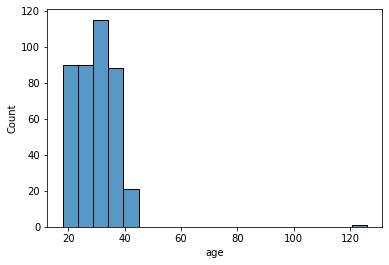

In [21]:
sns.histplot(df['age'], bins=20)

We clearly see there is like 1-2 outlier(s) that have an age of around 120. Here are 4 things we can do:
<ul><li> Simply delete the row</li>
<li> Set minimum and maximum</li>
<li> Delete the value (not the row)</li>
<li> If there are good assumptions, use that value.</li></ul>
Here, we will use a maximum value and draw histogram again.

<AxesSubplot:xlabel='age', ylabel='Count'>

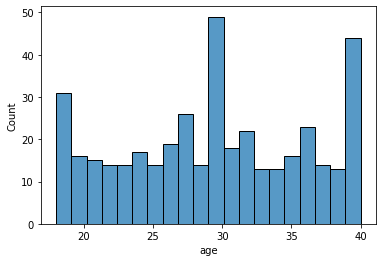

In [22]:
df.loc[df['age'] > 40, 'age'] = 40

sns.histplot(df['age'], bins=20)

<h3 style="margin-bottom:0">6) Ensuring Uniqueness</h3>

We may have full (all of the columns) or partial (some of the columns) duplicates. This is common because people may fill forms again and again to be sure that they have filled it. Also, this may occur due to bugs, errors or joining different datasets into one.

We have duplicated() function that finds full duplicates by default.

In [23]:
duplicate = df.duplicated()
df[duplicate]

,first_name,last_name,age,blood_type,marriage_status,salary
395,Maya,Casey,40.0,B+,unmarried,3993.0


This duplicate can take "keep" parameter that can take values "first", "last" or False. First means keep the first occurence and mark the rest duplicated, Last does the opposite and False returns all duplicate pairs.

In [24]:
full_duplicates = df[df.duplicated(keep=False)]
full_duplicates

,first_name,last_name,age,blood_type,marriage_status,salary
386,Maya,Casey,40.0,B+,unmarried,3993.0
395,Maya,Casey,40.0,B+,unmarried,3993.0


We can also find partial duplicates with subset parameter.

In [25]:
partial_duplicates = df[df.duplicated(subset=['first_name','last_name','age','blood_type'], keep=False)]
partial_duplicates

,first_name,last_name,age,blood_type,marriage_status,salary
5,Briony,Owens,21.0,0-,married,5688.0
20,Briony,Owens,21.0,0-,married,1245.0
79,Maya,Casey,40.0,B+,married,3993.0
386,Maya,Casey,40.0,B+,unmarried,3993.0
395,Maya,Casey,40.0,B+,unmarried,3993.0


We can drop duplicates (if you want to drop full duplicates you do not need to pass a subset parameter):

In [26]:
df.drop_duplicates(subset=['first_name','last_name','age','blood_type'], keep='last', inplace = True)


Here, we deleted all duplicates and did this function "inplace" which means change is done in-place rather than returning a new data frame. So, we check duplicates again and see that we have no duplicates now.

In [27]:
partial_duplicates = df[df.duplicated(subset=['first_name','last_name','age','blood_type'], keep=False)]
partial_duplicates

,first_name,last_name,age,blood_type,marriage_status,salary


<h3 style="margin-bottom:0">7) Dealing with Null Values</h3>

Now, we will have a look at how to deal with null values. In real life, you probably need to deal with low-quality data, and your dataset probably has missing values. To fit machine learning models to your data set should be complete. In this case, you may want to remove these missing values from your data set, or you may want to use some imputation techniques to fill the NA values. To make a logical choice, you should first understand how NA values are distributed in the data set. 

In [28]:
df.isna().sum()

first_name         0
last_name          0
age                8
blood_type         0
marriage_status    0
salary             4
dtype: int64

We only have null values in age and salary.

<h4 style="margin-bottom:0">a) Missingno</h4>

Missingno package provides a nice visual summary of missing data distribution. We can see how much missing data each variable have with a bar chart.

<AxesSubplot:>

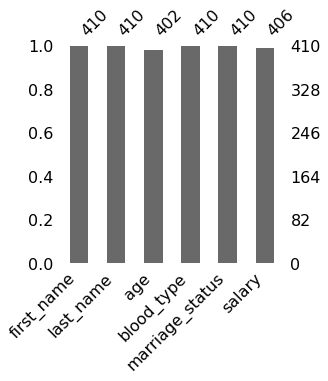

In [29]:
msno.bar(df, figsize=(4,4))

Also, we can visualize missing data with a matrix form. You can infer whether missingness of a variable is likely to be caused by another variable's missingness here. We first sort the data according to age, so all null values will appear at the bottom and then, we look at other data missingness'. We also put the missing columns to the right to better visualize them.

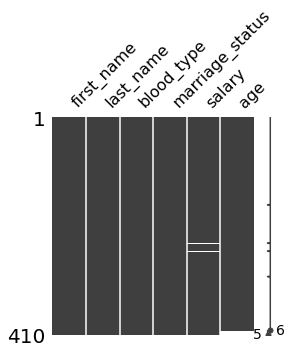

In [30]:
df.sort_values(by=['age'], inplace = True)
df = df[['first_name', 'last_name', 'blood_type', 'marriage_status', 'salary','age']]
msno.matrix(df, figsize=(4,4))
plt.show()

Just to remind you, I also uploaded the figure below (data here is totally unrelated to our case) from our lecture notes. As you can see below, in part b, missingness of Y3, Y4 or Y5 is very likely to be a result of each other's missingness. However, in part d, we see the missingness is looking unrelated to other variables' missingness and this looks much similar to our case.

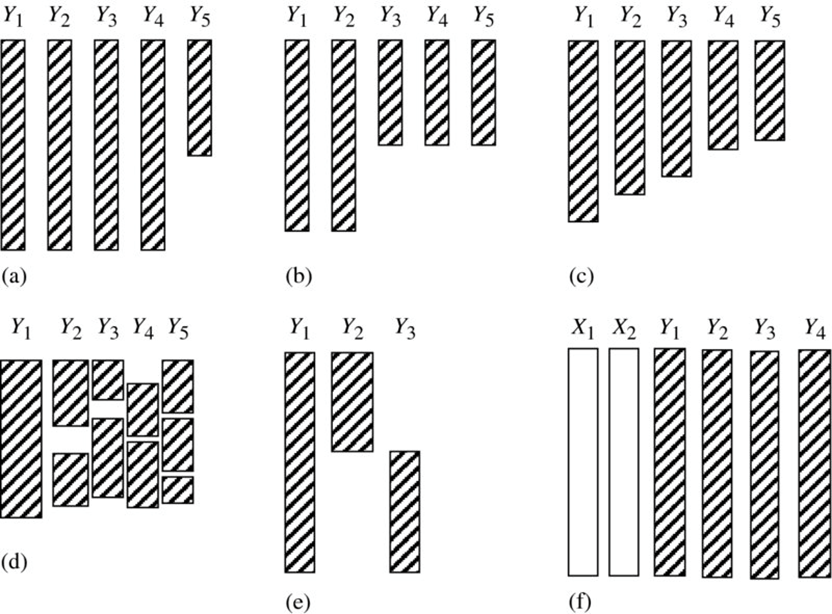

Finally, we can draw a correlation heatmap to understand whether there is a correlation between missingness.

Heatmap shows the correlation of missingness between every 2 columns.

- A value near -1 means if one variable appears then the other variable is very likely to be missing.  
- A value near 0 means there is no dependence between the occurrence of missing values of two variables.  
- A value near 1 means if one variable appears then the other variable is very likely to be present.  

However please notice that

- If there isn't any missing in an attribute/column, this attribute/column isn't shown in the heatmap.

<AxesSubplot:>

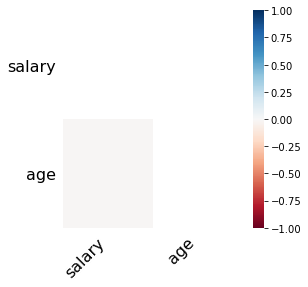

In [31]:
msno.heatmap(df, figsize=(4,4))

To calculate correlations between categorical variables, we can also create a missingness map with the following function:

In [32]:
def create_missingness_map(mis_data):
    columns=mis_data.columns
    print(columns)
    mis_map=pd.DataFrame(data=np.zeros(mis_data.shape), columns=mis_data.columns, dtype=int)
    for col in columns:
        col_mis_index=mis_data[mis_data[col].isnull()].index
        mis_map.loc[col_mis_index,col]=1    
    return mis_map

This missingness map converts our dataframe and puts 0 to every entry that is not null and puts 1 to every entry that is null.

In [33]:
mis_map = create_missingness_map(df)
mis_map[(mis_map['age'] == 1) | (mis_map['salary'] == 1)]

Index(['first_name', 'last_name', 'blood_type', 'marriage_status', 'salary',
       'age'],
      dtype='object')


,first_name,last_name,blood_type,marriage_status,salary,age
19,0,0,0,0,0,1
67,0,0,0,0,1,0
85,0,0,0,0,0,1
109,0,0,0,0,1,0
143,0,0,0,0,0,1
209,0,0,0,0,0,1
246,0,0,0,0,1,0
269,0,0,0,0,0,1
302,0,0,0,0,1,0
335,0,0,0,0,0,1


Cross-tabulation, also known as cross-tab or contingency table, is a statistical tool used for categorical data. A cross-tab report shows the connection between two or more questions asked in the study. In our case, when we check cross tab (which is a function in pandas) between marriage status and missingness of age variables, we get the cross tab of:

In [34]:
tab = pd.crosstab(df["marriage_status"], mis_map["age"])
tab

age,0,1
marriage_status,,
married,179,4
unmarried,217,4


To statistically check the correlation, we can use ch2_contingency test of stats library.

$H_{0}$: Missingness of age is independent of marriage status.  
$H_{1}$: Missingness of age is  not independent of marriage status.  

In [35]:
chi2, p, dof, ex = stats.chi2_contingency(tab)
print("p value:%.4f" % p)
if p <0.05:    
    print("Reject null hypothesis >> Missingness of x2 is not independent of x1")
else:
    print("Fail to reject null hypothesis >> Missingness of x2 is independent of x1")


p value:0.9293
Fail to reject null hypothesis >> Missingness of x2 is independent of x1


Here, we can conclude that missingness of age is independent of marriage status. You always have to check whether missingness of a variable is dependent on any other. This will define your imputation method which we will talk about next.

<h4 style="margin-bottom:0">b) Dealing with NA Values</h4>

<h5 style="margin-bottom:0">i) Dropping NA Values</h5>

This is the simplest thing we can do, however we may lose information here, so it is not the best in many situations. We will create a new dataframe (df1) and drop null values. Then, we will check whether we have any nulls afterwards.

In [36]:
df1 = df.copy()
df1 = df1.dropna()
df1.describe()

,salary,age
count,398.000000,398.000000
mean,5428.819095,29.334171
std,2652.490031,6.497927
min,542.000000,18.000000
25%,3259.750000,24.000000
50%,5425.500000,29.000000
75%,7827.750000,35.000000
max,9966.000000,40.000000


In [37]:
df1.isnull().sum()

first_name         0
last_name          0
blood_type         0
marriage_status    0
salary             0
age                0
dtype: int64

<h5 style="margin-bottom:0">ii) Mean & Median Imputation</h5>

We can fill NA values with the mean or median of the column. We will only show mean here but same can be done replacing every "mean" with "median". We will use mean imputation to impute our main dataset.

In [38]:
df = df.copy()
mean = df.mean()
df.fillna(mean, inplace=True)
df.describe()

,salary,age
count,410.000000,410.000000
mean,5387.041872,29.355721
std,2645.305503,6.410210
min,542.000000,18.000000
25%,3248.750000,24.000000
50%,5387.041872,29.355721
75%,7735.250000,35.000000
max,9966.000000,40.000000


In [39]:
df.isnull().sum()

first_name         0
last_name          0
blood_type         0
marriage_status    0
salary             0
age                0
dtype: int64

<h5 style="margin-bottom:0">iii) MICE Imputation</h5>

This method can be used to fit most statsmodels models to data sets with missing values using the ‘multiple imputation with chained equations’ (MICE) approach. As it is not much applicable to our dataset, we will use another dataset which is called mice_missing.csv.

In [40]:
mice_data=pd.read_csv("mice_missing.csv")
mice_data.head()

,c1,c2,c3,c4,target
0,8.34,NaN,1010.84,90.01,480.48
1,23.64,NaN,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


First, we check how many missing data we have.

In [41]:
for columns in mice_data:
    print(columns, "--> # of missing value", mice_data[columns].isna().sum(), ",   missingness_ratio:%.2f" % (mice_data[columns].isna().sum()/len(mice_data)))

c1 --> # of missing value 669 ,   missingness_ratio:0.07
c2 --> # of missing value 1052 ,   missingness_ratio:0.11
c3 --> # of missing value 478 ,   missingness_ratio:0.05
c4 --> # of missing value 1243 ,   missingness_ratio:0.13
target --> # of missing value 0 ,   missingness_ratio:0.00


Now, we need to create a MICE with 3 parameters, formula we use, model (technique) we use and our data. Here, we will use a regression with ordinary least squares method. Then, we need to decide on how many imputations we will be using. We choose 3 and you can refer to <a href="https://stefvanbuuren.name/fimd/sec-howmany.html">this website</a>

In [42]:
np.random.seed(123)
imp = mice.MICEData(mice_data)
fml = 'target ~ c1 + c2 + c3 + c4'
mice1 = mice.MICE(fml, sm.OLS, imp)
results = mice1.fit(0,3)
print(results.summary())

                            Results: MICE
Method:                     MICE         Sample size:           9568 
Model:                      OLS          Scale                  20.87
Dependent variable:         target       Num. imputations       3    
---------------------------------------------------------------------
           Coef.   Std.Err.     t     P>|t|   [0.025   0.975]   FMI  
---------------------------------------------------------------------
Intercept 458.1382  10.8389   42.2680 0.0000 436.8944 479.3821 0.1885
c1         -1.9806   0.0177 -112.0813 0.0000  -2.0152  -1.9459 0.2512
c2         -0.2335   0.0082  -28.5220 0.0000  -0.2495  -0.2174 0.2024
c3          0.0588   0.0105    5.5950 0.0000   0.0382   0.0793 0.1864
c4         -0.1599   0.0045  -35.1703 0.0000  -0.1688  -0.1509 0.1648



Now, as we've built our model, we can fill mice data.

In [43]:
d=np.zeros(mice_data.shape)
dumb=pd.DataFrame(d, columns=["c1", "c2","c3","c4", "target"])
for i in range(3):
    print(imp.next_sample().head())
    dumb=dumb+imp.data
    print("---------")    
fill_mice_data=dumb/3
fill_mice_data.head()

      c1     c2       c3     c4  target
0   8.34  36.18  1010.84  90.01  480.48
1  23.64  59.44  1011.40  74.20  445.75
2  29.74  56.90  1007.15  41.91  438.76
3  19.07  49.69  1007.22  76.79  453.09
4  11.80  40.66  1017.13  97.20  464.43
---------
      c1     c2       c3     c4  target
0   8.34  39.61  1010.84  90.01  480.48
1  23.64  62.96  1011.40  74.20  445.75
2  29.74  56.90  1007.15  41.91  438.76
3  19.07  49.69  1007.22  76.79  453.09
4  11.80  40.66  1017.13  97.20  464.43
---------
      c1     c2       c3     c4  target
0   8.34  43.14  1010.84  90.01  480.48
1  23.64  62.40  1011.40  74.20  445.75
2  29.74  56.90  1007.15  41.91  438.76
3  19.07  49.69  1007.22  76.79  453.09
4  11.80  40.66  1017.13  97.20  464.43
---------


,c1,c2,c3,c4,target
0,8.34,39.643333,1010.84,90.01,480.48
1,23.64,61.600000,1011.40,74.20,445.75
2,29.74,56.900000,1007.15,41.91,438.76
3,19.07,49.690000,1007.22,76.79,453.09
4,11.80,40.660000,1017.13,97.20,464.43


If this is complex to you, you can refer <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/">this article</a> to better grasp the idea.

<h3 style="margin-bottom:0">8) Encoding</h3>

You might observe that some of the text character fields have irregular and unrecognizable patterns. This can especially happen when you deal with data that is for example in Turkish, Japanese or Arabic. This is because utf-8 is the default python encoding. All code is in utf-8. Therefore when the data is clubbed from multiple structured and unstructured sources and saved at a commonplace, irregular pattern in the text are observed. This can be due to different encodings such as ASCII or utf-16, etc.

The solution to this problem is to first find out the character encoding of the file with the help of chardet module in python as follows ('rb' means read them as binary):

In [44]:
data = open("demographics.csv",'rb')

result = chardet.detect(data.read(10000))

print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


After finding the type of encoding, if it is different from utf-8, save the file using “utf-8” encoding using the following command.

In [45]:
 df.to_csv("file_name.csv", encoding="utf-8-sig")

You can pass "encoding='utf-8-sig'" to make it utf-8.

In [46]:
data = open("file_name.csv",'rb')

result = chardet.detect(data.read(10000))

print(result)

{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}


<h3 style="margin-bottom:0">9) Collapsing Data Into Categories</h3>

Finally, we will have a look at how we can collapse data into categories. We will use salary for this purpose.

In [47]:
ranges = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,np.inf]
labels = ['1-2k', '2-3k', '3-4k', '4-5k', '5-6k', '6-7k', '7-8k', '8-9k', '9-10k', '10k+']

df['income_group'] = pd.cut(df['salary'], bins=ranges, labels=labels)

"cut" function divides a column and we assign it to income group. We can have a look at a sample below.

In [48]:
df.sample(5)

,first_name,last_name,blood_type,marriage_status,salary,age,income_group
298,Lana,Cameron,B-,married,5226.0,25.0,5-6k
320,Abigail,Robinson,0-,unmarried,1855.0,26.0,1-2k
101,Rafael,Cunningham,B+,unmarried,1351.0,38.0,1-2k
104,James,Craig,AB+,married,2217.0,40.0,2-3k
80,Agata,Bennett,0-,unmarried,9055.0,33.0,9-10k


<h3 style="margin-bottom:0">10)References & Useful Links</h3>


<p style="margin-top:0; text-align: justify">This tutorial is prepared with the help of <a href="https://towardsdatascience.com/master-the-most-hated-task-in-ds-ml-3b9779276d7c#5213">this website</a> and <a href="https://towardsdev.com/data-type-constraints-data-range-constraints-duplicate-data-with-pandas-44897a350b1e">this website.</a></p>
<br>
<p style="margin-top:0; text-align: justify">You can always refer to those websites. If you cannot find a solution, you are very likely to find an answer for your questions on the internet as data preprocessing is a common task. If you still cannot find an answer, please do not hesitate to ask your questions to course assistants.</p>

<a href="https://github.com/ResidentMario/missingno">GitHub - missingno</a> This is the GitHub repository of missingno library. There are a lot of explanation regarding this library here. </p> 

<a href="https://towardsdev.com/data-type-constraints-data-range-constraints-duplicate-data-with-pandas-44897a350b1e">Master the Most Time-consuming Task in DS/ML:</a> This is a Medium article that has tons of useful examples and functions regarding data preprocessing.</p> 

<a href="https://towardsdatascience.com/master-the-most-hated-task-in-ds-ml-3b9779276d7c#5213">Master the Most Hated Task in DS/ML:</a> This is also a Medium article that has tons of useful examples and functions regarding data preprocessing.</p> 